## 1. Критерии основанные на нормальности

Согласия: Колмогорова-Смирнова, Шапиро-Уилка

### Критерий Вальда

Пусть необходимо проверить гипотезу относительно некоторого "удобного параметра" (например, матожидание), но распределение выборки неизвестно. Можно использовать критерий Вальда.

Напоминание: оценка $\hat{\theta}$ называется асимптотически нормальной оценкой параметра $\theta$, если для некоторого действительного числа $s$ выполнено

$\sqrt{n}\frac{\hat{\theta} - \theta}{s} \to \mathcal N(0, 1)$ по распределению при $n \to \infty$.

Для проверки гипотезы $H_0: \theta = \theta_0$ против альтернативы $H_1: \theta \neq \theta_0$ критерий Вальда строится так. Пусть $\hat{\theta}$ - асимптотически нормальная оценка параметра $\theta$, $\hat{se}$ - состоятельная оценка стандартного отклонения $s/\sqrt{n}$. Тогда гипотеза $H_0$ отвергается, если $|W| > z_{\alpha/2}$, где

$z_{\alpha/2}$ -  квантиль стандартного нормального распределения

$W = \frac{\hat{\theta} - \theta}{\hat{se}}$.

Упражнение. Критерий Вальда имеет асимптотически размер $\alpha$:

$\mathbb P(|W| > z_{\alpha/2} | \theta=\theta_0) \to \alpha,~n\to\infty.$

##### Широкий использования критерия

Вспомним, что выборочное среднее - это асимптотически нормальная оценка матожидания. Возьмём в качестве оценки $\hat{s}$ корень из выборочной дисперсии.

##### Пример. 
Предположим, что у нас есть 10 статей, написанных автором, скрывающемся под псевдонимом. Мы подозреваем, что эти статьи на самом деле написаны некоторым известным писателем. Чтобы проверить эту гипотезу, мы подсчитали доли четырехбуквенных слов в 8-и сочинениях подозреваемого нами автора:

In [ ]:
sample_main = [.224, .261, .216, .239, .229, .228, .234, .216]

В 10 сочинениях, опубликованных под псевдонимом, доли четырехбуквенных слов равны

In [ ]:
sample_pseudo = [.207, .204, .195, .209, .201, .206, .223, .222, .219, .200]

Используйте критерий Вальда. Найдите p-value и 95%-ый асимптотический доверительный интервал для разницы средних значений. Какой можно сделать вывод исходя из найденных значений?

In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sample_main = np.array(sample_main)
n = len(sample_main)
sample_pseudo = np.array(sample_pseudo)
m = len(sample_pseudo)

mean_1 = sample_main.mean()
mean_2 = sample_pseudo.mean()

NameError: name 'sample_main' is not defined

In [ ]:
se1 = np.sqrt(np.sum((sample_main - mean_1)**2) / (n - 1)) / np.sqrt(n)
se2 = np.sqrt(np.sum((sample_pseudo - mean_2)**2) / (m - 1)) / np.sqrt(m)

In [ ]:
W = (mean_1 - mean_2) / np.sqrt(se1**2 + se2**2)

Критерий уровня значимости 0.05

In [ ]:
alpha = 0.05
z = sts.norm().ppf(1 - alpha/2)
print(f'Hypothesis rejected: {np.abs(W) > z}')

Hypothesis rejected: True


In [ ]:
mean_1

0.230875

In [ ]:
mean_2

0.20860000000000004

In [ ]:
for p in np.linspace(0, 1, 1000):
    z = sts.norm().ppf(1 - p/2)
    if np.abs(W) > z:
        print(p)
        break

0.001001001001001001


Замечание. Мы никак не использовали модель распределения данных!

### Критерий Пирсона

Пусть известна выборка из мультиномиального распределения: имеется $k$ исходов и для каждого исхода задана вероятность $\mathbf p^k: p_i,~ i = 1, \dots, k$. Выборка представляет собой количество реализаций для каждого из исходов: $X_1, \dots, X_k$, суммарно $n$ реализаций: $\sum_{i=1}^kX_i = n$.

Для проверки гипотезы $H_0: \mathbf p = \mathbf p_0$ против альтернативы $H_1: \mathbf p \neq \mathbf p_0$ используется критерий Пирсона. Нулевая гипотеза отклоняется, если

$T > \chi^2_{k-1, 1 - \alpha}$, где

$T = \sum_{i=1}^k\frac{(X_i - np_{0i})^2}{np_{0i}}$

Утверждение. Асимптотически уровень значимости такого критерия равен $\alpha$, так как статистика $T$ сходится по распределению к случайной величине, имеющей распределение хи-квадрат с $k-1$ степенью свободы.

##### Пример. Горох Менделя
Генетические эксперименты Менделя показали, что при скрещивании гороха двух типов - круглый желтый и сморщенный зеленый, имеется 4 типа потомков: круглые желтые, сморщенные желтые, круглые зеленые и сморщенные зеленые. Кроме того, Мендель показал экспериментально, что вероятности появления каждого из потомков равны $\mathbf p_0 = \left(\frac{9}{16}, \frac{3}{16}, \frac{3}{16}, \frac{1}{16}\right)$.

В результате эксперимента получили $n = 556$ растений гороха, причём количество растения различных типов получили $X = (315, 101, 108, 32)$ соответственно. Проверьте гипотезу на уровне значимости $\alpha = 0.05$ и найдите p-value. Противоречат ли результаты теории Менделя?

In [ ]:
X = np.array([315, 101, 108, 32])
n = np.sum(X)
k = 4

p_0 = np.array([9/16, 3/16, 3/16, 1/16])

print(X / n)
print(p_0)


T = np.sum((X - n * p_0)**2 / (n * p_0))
alpha = 0.05
z = sts.chi2(k - 1).ppf(1 - alpha)
print(f'Hypothesis rejected: {T > z}')

for p in np.linspace(0, 1, 1000):
    z = sts.chi2(k - 1).ppf(1 - p)
    if T > z:
        print(f'p_value={p}')
        break

[0.56654676 0.18165468 0.1942446  0.05755396]
[0.5625 0.1875 0.1875 0.0625]
Hypothesis rejected: False
p_value=0.9259259259259259


In [ ]:
N = 1000
X = sts.norm().rvs(N)

def cdf(x):
    return sts.norm().cdf(x)

sts.kstest(X, cdf)

KstestResult(statistic=0.012733249248085166, pvalue=0.07744730590778282)

### Анализ степени зависимости

##### Определение. 
Ковариацией двух случайных величин называется величина

$cov(X, Y) = \mathbb E(X - \mathbb EX)(Y - \mathbb EY)$.

##### Определение
Коэффициентом корреляции двух случайных величин называется 

$\rho = \frac{cov(X, Y)}{\sqrt{\mathbb DX \mathbb DY}}$.

Свойства:

- $\rho \in [-1, 1]$
- $|\rho| = 1$ тогда и только тогда, когда $X$ и $Y$ зависимы
- если величины независимы, то $\rho = 0$, но обратное в общем случае не верно.

Пусть даны выборки $\mathbf X^n$, $\mathbf Y^n$, причём $(X_i, Y_i)_{i=1}^n$ - также выборка.

Коэффициентом корреляции Пирсона называется статистика

$\hat{\rho} = \frac{\sum_{i=1}^n(X_i - \overline{\mathbf X^n})(Y_i - \overline{\mathbf Y^n})}{\sqrt{\sum_{i=1}^n(X_i - \overline{\mathbf X^n})^2\sum_{i=1}^n(Y_i - \overline{\mathbf Y^n})^2}}$.

Упражнение. Показать, что $\hat{\rho} \to \rho$.

Это означает, что при $\hat{\rho} > 0$ можно предполагать, что $\rho$ близко к $\hat{\rho}$, то есть выборки не являются независимыми.

Однако, утверждать независимость с помощью такой проверки не получится, так как 
- некоррелированность не означает независимости (п3)
- такой коэффициент сильно зависит от выбросов в данных
- хорошо показывает степень зависимости только в случае линейной зависимости выборок

##### Задача
Сгенерируйте выборки из различных распределений (нормального, равномерного). Для каждого случая возьмите 2 случая: 1) выборки не зависимы 2) выборки линейно зависимы.

1. Постройте график зависимости $\hat{\rho}(n)$. Сделайте вывод - как можно использовать такой коэффициент корреляции.

2. На размере выборки $n = 1000$ добавьте в выборку выброс значения $x$. Постройте график зависимости $\hat{\rho}(x)$. 

3. На размере выборки $n = 1000$ повторите эксперимент $M = 1000$ раз и сравните распределение статистики $\hat{\rho}$ в случае независимых и в случае зависимых выборок.

In [ ]:
def pearson_correlation(X, Y):
    # return correlation coeff(X[:n], Y[:n]) for every n [1, size]
    n = len(X)
    means_x = np.cumsum(X) / (np.arange(n) + 1)
    means_y = np.cumsum(Y) / (np.arange(n) + 1)
    
    var_x = []
    for i in range(1, n):
        var = np.sum((X[:i+1] - means_x[i])**2) / i
        var_x.append(var)
    var_x = np.array(var_x)
    
    var_y = []
    for i in range(1, n):
        var = np.sum((Y[:i+1] - means_y[i])**2) / i
        var_y.append(var)
    var_y = np.array(var_y)
    
    return (np.cumsum(X * Y) / (np.arange(n) + 1) - means_x * means_y)[1:] / np.sqrt(var_x * var_y)

In [ ]:
def pearson_correlation_n(X, Y):
    n = len(X)
    mean_X = np.mean(X, axis=-1)
    mean_Y = np.mean(Y, axis=-1)
    
    return np.sum((X - mean_X) * (Y - mean_Y), axis=-1) / np.sqrt(np.sum((X - mean_X)**2, axis=-1) * np.sum((Y - mean_Y)**2, axis=-1))

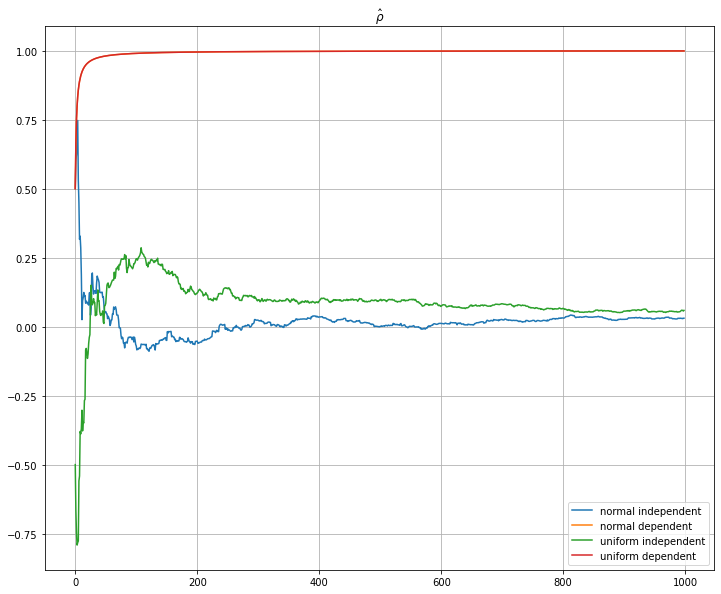

In [ ]:
N = 1000
# 1
# normal
X_I, Y_I = sts.norm().rvs(N), sts.norm().rvs(N)
X_D = sts.norm().rvs(N)
Y_D = X_D * 2 - 1

corr_norm_I = pearson_correlation(X_I, Y_I)
corr_norm_D = pearson_correlation(X_D, Y_D)

# uniform
X_I, Y_I = sts.uniform().rvs(N), sts.uniform().rvs(N)
X_D = sts.uniform().rvs(N)
Y_D = 0.5 * X_D + 0.5

corr_uniform_I = pearson_correlation(X_I, Y_I)
corr_uniform_D = pearson_correlation(X_D, Y_D)

plt.figure(figsize=(12,10))
plt.title(r"$\hat{\rho}$")
n = np.arange(1, N)
plt.plot(corr_norm_I, label='normal independent')
plt.plot(corr_norm_D, label='normal dependent')
plt.plot(corr_uniform_I, label='uniform independent')
plt.plot(corr_uniform_D, label='uniform dependent')
plt.grid()
plt.legend()

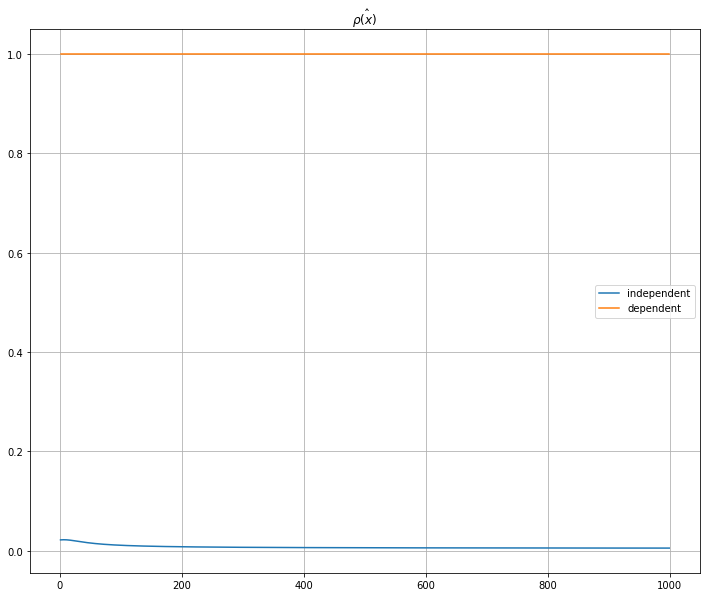

In [ ]:
# 2

X_I, Y_I = sts.norm().rvs(N), sts.norm().rvs(N)
X_D = sts.norm().rvs(N)
Y_D = X_D * 2 - 1

corr_I = []
corr_D = []
x_anomal = np.arange(1, 1000)

for x in x_anomal: 
    X_I[0] = x
    corr_I.append(pearson_correlation_n(X_I, Y_I))
    
    X_D[0] = x
    Y_D[0] = 2 * x - 1
    
    corr_D.append(pearson_correlation_n(X_D, Y_D))
    
plt.figure(figsize=(12,10))
plt.title(r'$\hat{\rho(x)}$')
plt.grid()
plt.plot(x_anomal, corr_I, label='independent')
plt.plot(x_anomal, corr_D, label='dependent')
plt.legend()

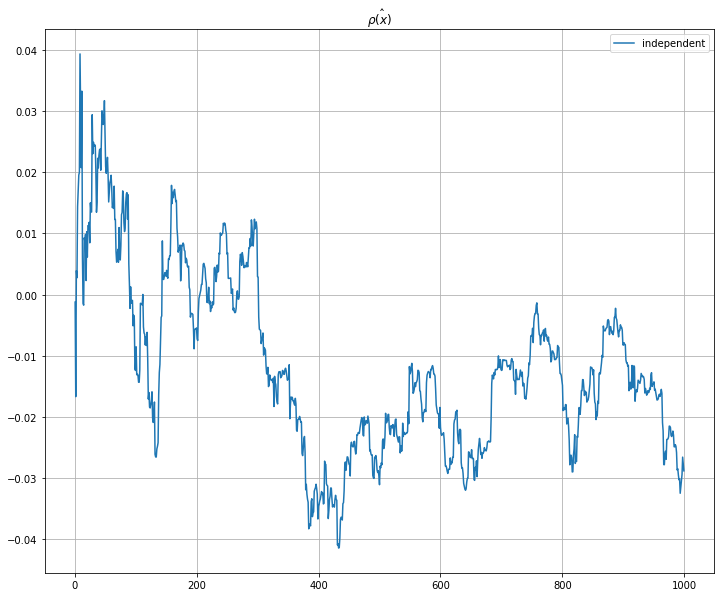

In [ ]:
# more anomalies

X_I, Y_I = sts.norm().rvs(N), sts.norm().rvs(N)
X_D = sts.norm().rvs(N)
Y_D = X_D * 2 - 1

corr_I = []
corr_D = []
sum_anomalies = []
x_anomal = np.arange(1, 1000)

for i in range(1000):
    mask = np.random.randint(200)
    x = x_anomal[np.random.randint(200)]
    X_I[mask] = x
    corr_I.append(pearson_correlation_n(X_I, Y_I))
    sum_anomalies.append(np.sum(x))
    
plt.figure(figsize=(12,10))
plt.title(r'$\hat{\rho(x)}$')
plt.grid()
plt.plot(x_anomal, corr_I[:-1], label='independent')
plt.legend()

Text(0.5, 1.0, 'Almost dependent $f(x) + noise$')

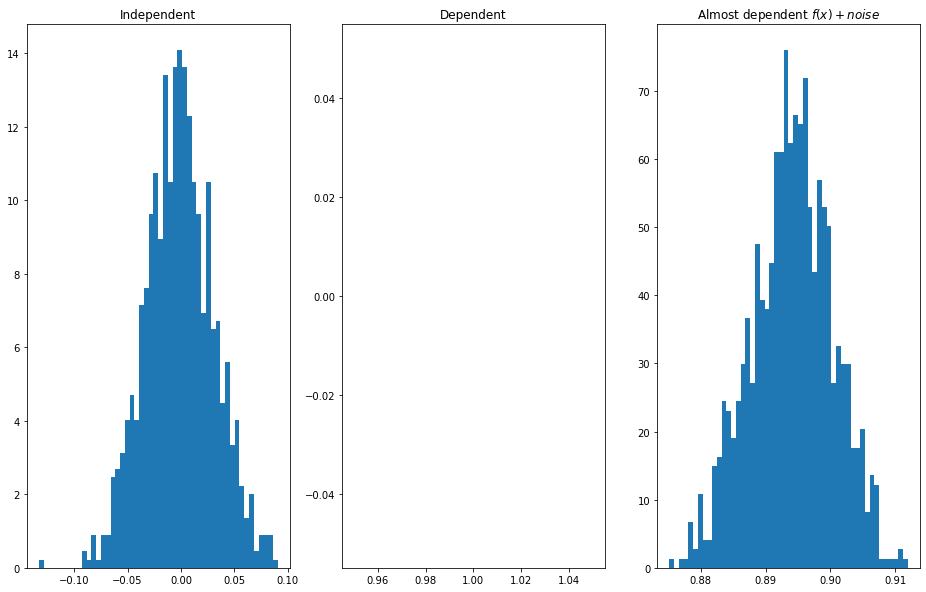

In [ ]:
M = 1000
# normal
X_I, Y_I = sts.norm().rvs((M, N)), sts.norm().rvs((M, N))
X_D = sts.norm().rvs((M, N))
Y_D = X_D * 2 - 1
Y_semi = X_D * 2 - 1 + sts.norm(0, 1).rvs((M, N))

corr_I = pearson_correlation_n(X_I, Y_I)
corr_D = pearson_correlation_n(X_D, Y_D)
corr_semi = pearson_correlation_n(X_D, Y_semi)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,10))
ax1.hist(corr_I, bins=50, density=True)
ax1.set_title('Independent')
ax2.hist(corr_D, bins=50, density=True)
ax2.set_title('Dependent')
ax3.hist(corr_semi, bins=50, density=True)
ax3.set_title(r'Almost dependent $f(x) + noise$')

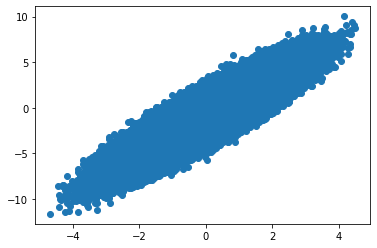

In [ ]:
plt.scatter(X_D, Y_semi)

Text(0.5, 1.0, 'Almost dependent $f(x) + noise$')

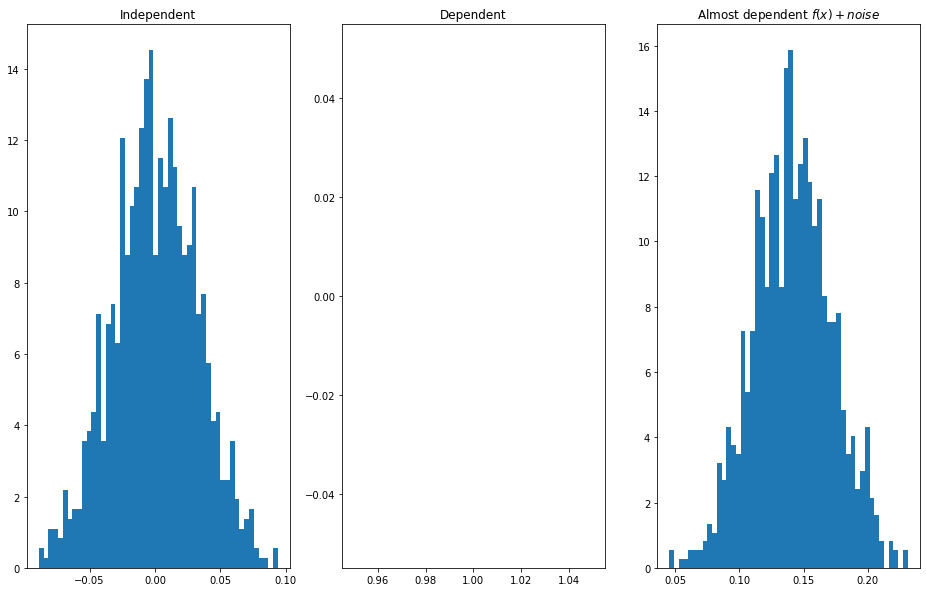

In [ ]:
M = 1000
# uniform
X_I, Y_I = sts.uniform().rvs((M, N)), sts.uniform().rvs((M, N))
X_D = sts.uniform().rvs((M, N))
Y_D = X_D * 0.5 - 0.5
Y_semi = X_D * 0.5 - 0.5 + sts.norm(0, 1).rvs((M, N))

corr_I = pearson_correlation_n(X_I, Y_I)
corr_D = pearson_correlation_n(X_D, Y_D)
corr_semi = pearson_correlation_n(X_D, Y_semi)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,10))
ax1.hist(corr_I, bins=50, density=True)
ax1.set_title('Independent')
ax2.hist(corr_D, bins=50, density=True)
ax2.set_title('Dependent')
ax3.hist(corr_semi, bins=50, density=True)
ax3.set_title(r'Almost dependent $f(x) + noise$')

Недостатки коэффициента корреляции Пирсона в меньшей степени присущи коэффициенту корреляции Спирмана, построение которого опирается на ранговый метод.

##### Определение
Рангом $R_i$ элемента выборки $X_i \in \mathbf X^n$ называется его номер как порядковой статистики:

$X_i = X_{(R_i)}$.

##### Определение

Пусть даны выборки $\mathbf X^n$, $\mathbf Y^n$, а $R_i$, $S_i$ - ранги их элементов соответственно. Коэффициентом корреляции Спирмана называется статистика 

$\rho_S = \frac{\sum_{i=1}^n(R_i - \overline{R})(S_i - \overline{S})}{\sqrt{\sum_{i=1}^n(R_i - \overline{R})^2\sum_{i=1}^n(S_i - \overline{S})^2}}$.

Утверждение. Так как ранги $R_i$ - это перестановка чисел $1, \dots, n$,

$\rho_S = 1 - \frac{6}{n^3 - n}\sum_{i=1}^n(R_i - S_i)^2$.

Свойства

- если выборки независимы, то $\mathbb E\rho_S = 0$.
- если выборки независимы, то $\mathbb D\rho_S = \frac{1}{n - 1}$.
- $\rho_S \in [-1, 1]$, причём при $R_i = S_i$ $\rho_S = 1$, при $R_i = S_{n - i + 1}$ $\rho_S = -1$.
- если выборки независимы, то распределение $\rho_S$ не зависит от распределений выборок и фиксированно. На размерах выборки $> 20$ хорошо приближается распределением Стьюдента (Student's t-distribution).

### Критерии для проверки независимости

Для проверки гипотезы $H_0:$ (выборки нескоррелированы) против альтернативы можно использовать критерий 

$T(\mathbf X^n, \mathbf Y^n) = \rho_S\sqrt{\frac{n - 2}{1 - \rho_S^2}} > t_{1 - \alpha}$, где $t$ - квантиль t-распределения Стъюдента с n-2 степенями свободы.

In [ ]:
# хи-квадрат критерий, критерий Уилкоксона

Сгенерируем выборки $\mathbf X^n$, $\mathbf Z^n$ из нормального распределения, $n = 1000$. Выборку $Y$ сгенерируем так: возьмём $k$ элементов из $\mathbf X^n$, оставшиеся $n - k$ элементов возьмём из $\mathbf Z^n$. Вычислим коэффициенты корреляции Пирсона и Спирмана и усредним их значения по $M = 100$ экспериментам. Построим зависимость $\rho(k)$. Какой она должна быть? Какой из коэффициентов лучше приближает наши предположения на практике?

In [ ]:
x = [10, 3, 4, 8, 2]
np.argsort(x)

array([4, 1, 2, 3, 0])

In [ ]:
def spearman_correlation_n(X, Y):
    r_x = np.argsort(X)
    r_y = np.argsort(Y)
    
    return pearson_correlation_n(r_x, r_y)

spierman= 1.0
pierson= 0.9885681680694287


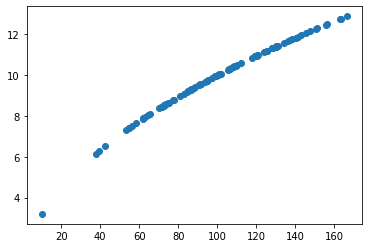

In [ ]:
X = sts.norm(100, 30).rvs(100)
Y = np.sqrt(X)
print('spierman=', spearman_correlation_n(X, Y))
print('pierson=', pearson_correlation_n(X, Y))

plt.scatter(X, Y)


In [ ]:
N = 1000
X = sts.norm().rvs(N)
Z = sts.norm().rvs(N)


s_corr = []
p_corr = []

ks = range(1, N)
for k in ks:
    mask = np.hstack((np.ones(k), np.zeros(N - k)))
    # mask = [1, 1, 1, ... k ...,1, 0, 0, 0, 0, ... N - k ..., 0, 0]
    np.random.shuffle(mask)
    mask = mask > 0
    
    Y = np.hstack((X[mask], Z[np.logical_not(mask)]))
    s_corr.append(spearman_correlation_n(X, Y))
    p_corr.append(pearson_correlation_n(X, Y))

Text(0.5, 1.0, '$\\rho_S(k)$')

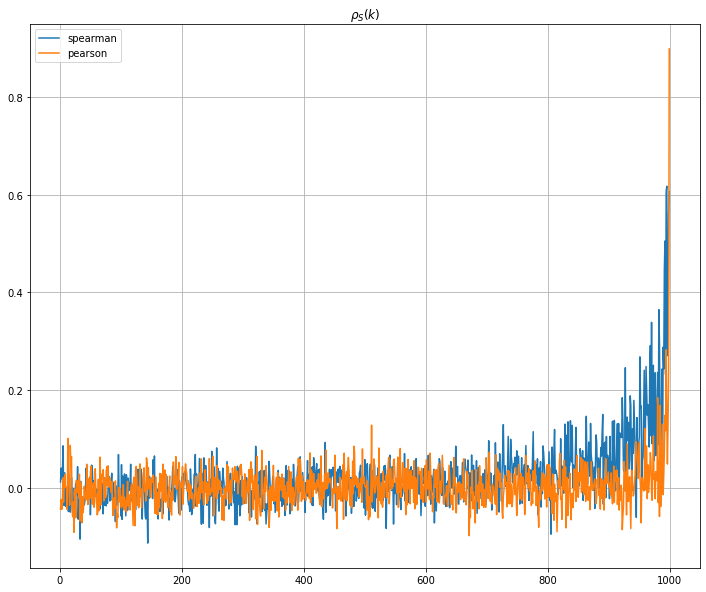

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(ks, s_corr, label="spearman")
plt.plot(ks, p_corr, label="pearson")
plt.grid()
plt.legend()
plt.title(r'$\rho_S(k)$')

In [ ]:
N = 1000
X = sts.norm().rvs(N)
Z = sts.norm().rvs(N)


s_corr = []
p_corr = []

ks = range(1, N)
for k in ks:
    mask = np.hstack((np.ones(k), np.zeros(N - k)))
    # mask = [1, 1, 1, ... k ...,1, 0, 0, 0, 0, ... N - k ..., 0, 0]
    mask = mask > 0
    
    Y = np.hstack((X[mask], Z[np.logical_not(mask)]))
    s_corr.append(spearman_correlation_n(X, Y))
    p_corr.append(pearson_correlation_n(X, Y))

Text(0.5, 1.0, '$\\rho_S(k)$')

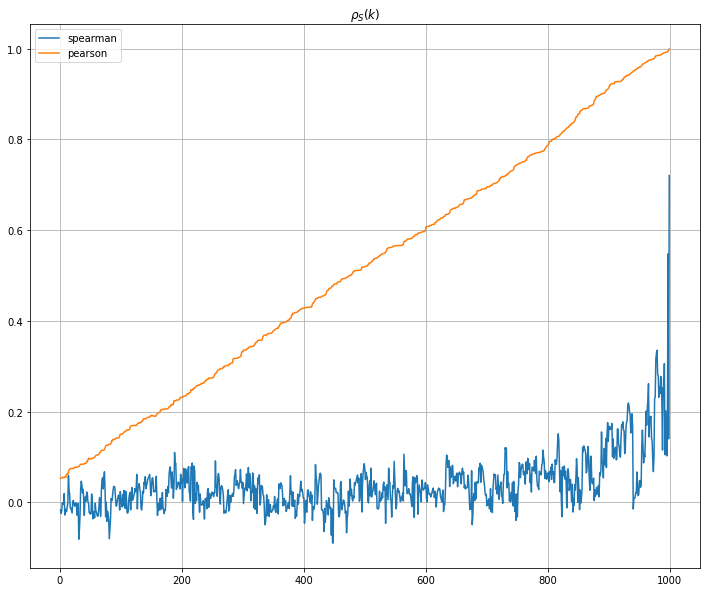

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(ks, s_corr, label="spearman")
plt.plot(ks, p_corr, label="pearson")
plt.grid()
plt.legend()
plt.title(r'$\rho_S(k)$')

##### Недостатки коэффициентов корреляции 

In [ ]:
def pmone(p, size):
    x = sts.bernoulli(p).rvs(size)
    x = np.where(x == 0, -1, 1)
    return x

In [ ]:
# X ** 2 + Y ** 2 = r ** 2
x = sts.uniform(-2, 4).rvs(100)
y = np.sqrt(4 - x ** 2) * pmone(0.5, 100)

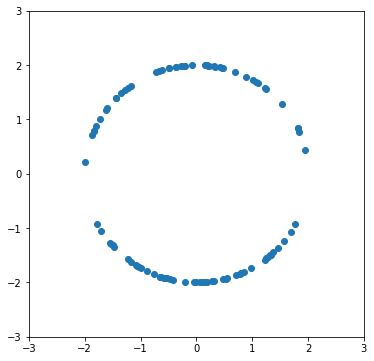

In [ ]:
plt.figure(figsize=(6, 6))
plt.xlim((-3, 3))
plt.ylim((-3, 3))
plt.scatter(x, y)

In [ ]:
pearson_correlation_n(x, y)

-0.038148256862455814

In [ ]:
spearman_correlation_n(x, y)

-0.06355835583558356

In [ ]:
x = sts.norm(0, 1).rvs(100)
y = x ** 2

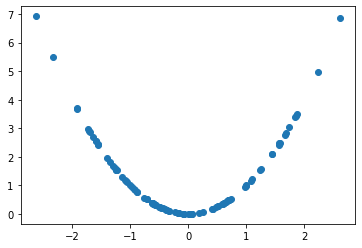

In [ ]:
plt.scatter(x, y)

In [ ]:
spearman_correlation_n(x, y)

-0.15072307230723073

In [ ]:
pearson_correlation_n(x, y)

-0.0024900997491730157

##### Анализ через функции распределения

In [ ]:
def empirical_f(y, bins, lims=None):
    if lims is None:
        lims = (np.min(y), np.max(y))
    x = np.linspace(lims[0], lims[1], bins).reshape((bins, 1))
    tile = np.tile(y, (len(x), 1))
    F = (tile <= x).sum(axis=1).squeeze() / len(y)
    return x, F

In [ ]:
y = sts.norm(0, 1).rvs(100)

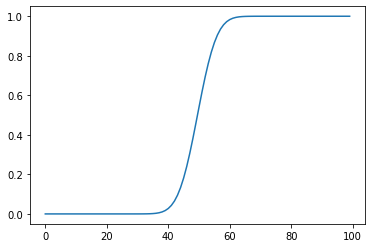

In [ ]:
plt.plot(sts.norm(0, 1).cdf(np.linspace(-10, 10, 100)))

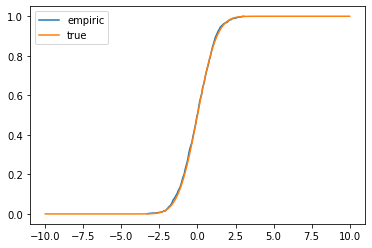

In [ ]:
y = sts.norm(0, 1).rvs(1000)
x, f = empirical_f(y, 100)
plt.plot(x, f, label='empiric')
x = np.linspace(-10, 10, 100)
plt.plot(x, sts.norm(0, 1).cdf(x), label="true")
plt.legend()

In [ ]:
def get_empirical_distribution_plots(x, y):
    N = len(x)
    assert len(x) == len(y)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    f_x_plot = [np.sum(x < x_value) / N for x_value in np.linspace(-3, 3, 100)]
    axs[0].plot(f_x_plot)
    axs[0].set_title('Empirical distribution of X')

    f_y_plot = [np.sum(y < y_value) / N for y_value in np.linspace(-3, 3, 100)]
    axs[1].plot(f_y_plot)
    axs[1].set_title('Empirical distribution of Y')

    value_diff = []
    joint_diff = []
    for x_value in np.linspace(-3, 3, 100):
        for y_value in np.linspace(-3, 3, 100):
            f_x = np.sum(x < x_value) / N
            f_y = np.sum(y < y_value) / N

            f_joint = np.sum(np.logical_and(x < x_value, y < y_value)) / N

            value_diff.append(abs(x_value - y_value))
            joint_diff.append(f_joint - f_x * f_y)

    axs[2].scatter(value_diff, joint_diff)
    axs[2].set_title('Empirical joint distribution')
    axs[2].set_xlabel('|x - y|')
    axs[2].set_ylabel(r'$F_{xy} - F_xF_y$')

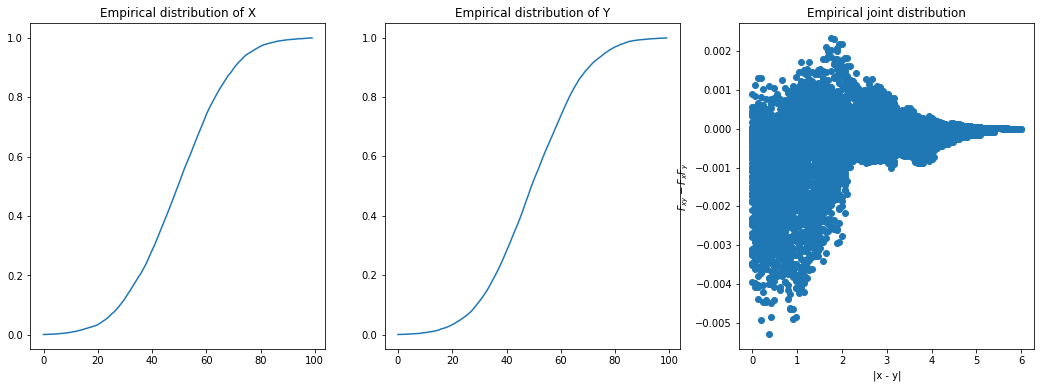

In [ ]:
N = 10000
x = sts.norm(0, 1).rvs(N)
y = sts.norm(0, 1).rvs(N)

get_empirical_distribution_plots(x, y)

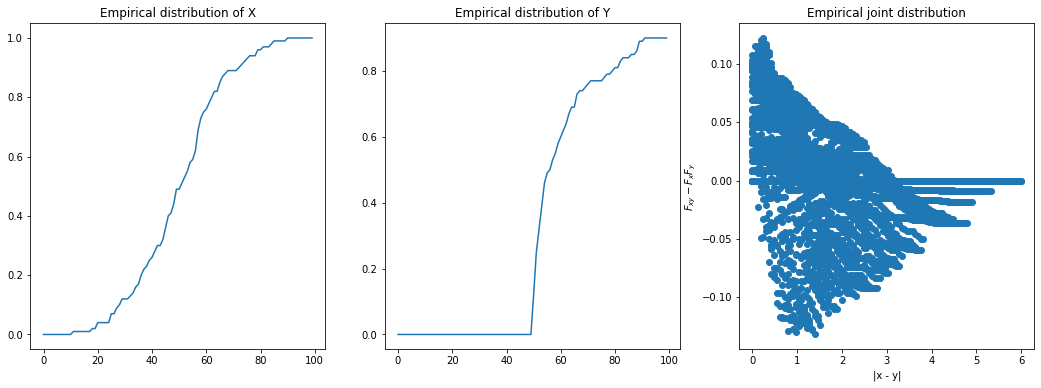

In [ ]:
N = 100
x = sts.norm(0, 1).rvs(N)
y = x ** 2

get_empirical_distribution_plots(x, y)